In [2]:
from helper import*
import params as cfg

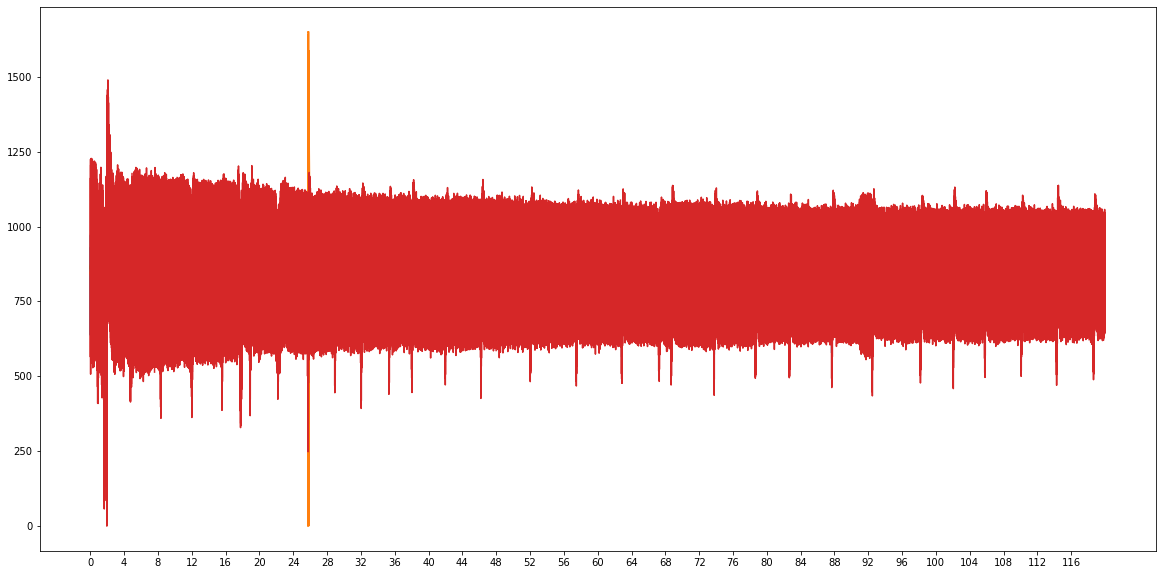

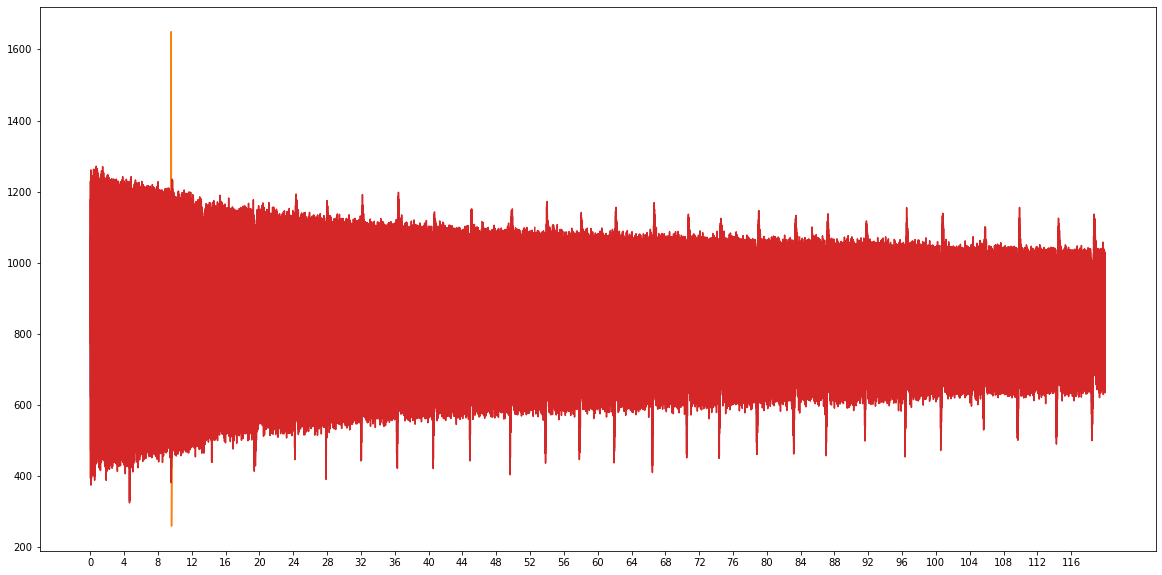

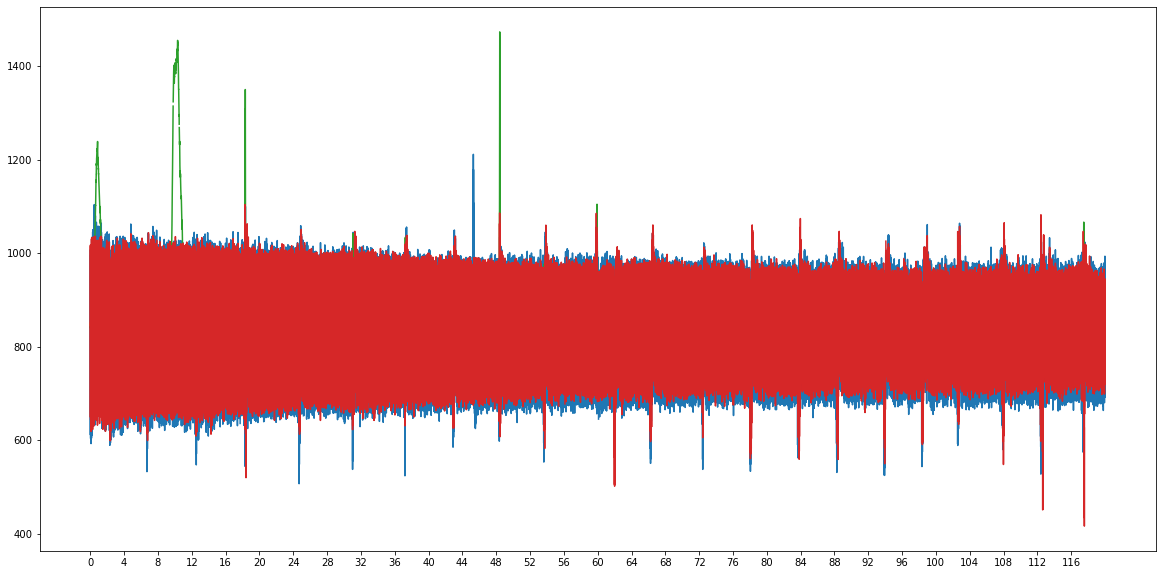

In [14]:
# import csv file
test_1 = pd.read_csv('/Users/joshuaighalo/Downloads/Mind_Monitor-3/mindMonitor_2022-11-01--08-08-23.csv')
test_2 = pd.read_csv('/Users/joshuaighalo/Downloads/Mind_Monitor-3/mindMonitor_2022-11-01--08-11-37.csv')
test_3 = pd.read_csv('/Users/joshuaighalo/Downloads/Mind_Monitor-3/mindMonitor_2022-11-01--08-14-48.csv')
# extract columns by header
test_1 = test_1[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']]
test_2 = test_2[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']]
test_3 = test_3[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']]

# convert to array of length 30720
test_1 = (test_1.to_numpy())[0:30720,:]
test_2 = (test_2.to_numpy())[0:30720,:]
test_3 = (test_3.to_numpy())[0:30720,:]

time = np.linspace(0,120,30720)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(time,test_1)
plt.xticks(np.arange(0, 120, 4))
plt.show()
plt.plot(time,test_2)
plt.xticks(np.arange(0, 120, 4))
plt.show()
plt.plot(time,test_3)
plt.xticks(np.arange(0, 120, 4))
plt.show()

In [2]:
#   Group-Task-Time
M11 = ['m11_1.zip','m11_2.zip','m11_3.zip','m11_4.zip','m11_5.zip']
M21 = ['m21_1.zip','m21_2.zip','m21_3.zip','m21_4.zip','m21_5.zip']
M12 = ['m12_1.zip','m12_2.zip','m12_3.zip','m12_4.zip','m12_5.zip']
M22 = ['m22_1.zip','m22_2.zip','m22_3.zip','m22_4.zip','m22_5.zip']
C11 = ['c11_1.zip','c11_2.zip','c11_3.zip','c11_4.zip','c11_5.zip']
C21 = ['c21_1.zip','c21_2.zip','c21_3.zip','c21_4.zip','c21_5.zip']
C12 = ['c12_1.zip','c12_2.zip','c12_3.zip','c12_4.zip','c12_5.zip']
C22 = ['c22_1.zip','c22_2.zip','c22_3.zip','c22_4.zip','c22_5.zip']
localDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/"
destDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/dest/"
os.system('rm -rf %s/*' % destDir)
fs_setting = 'constant'

In [3]:
"Functions utilized in this script"
def multipleFilesICA(input_3d,fs):
    ica_out = []
    for i in range(input_3d.shape[0]):
        ica_out.append(ICA(input_3d[i,:,:],fs))
    return np.array(ica_out)
def multipleFilesNotch(input_3d,fs):
    notch_out = []
    filtering = filters()
    for i in range(input_3d.shape[0]):
        notch_out.append(filtering.notch(input_3d[i,:,:],fs))
    return np.array(notch_out)
def pk2pk(input,threshold):
    def fnc(data,threshold_):
        data[np.where(abs(data) > threshold_)] = 0
        return data
    p1 = fnc(input[:,0],threshold[0])
    p2 = fnc(input[:,1],threshold[1])
    p3 = fnc(input[:,2],threshold[2])
    p4 = fnc(input[:,3],threshold[3])
    return np.array([p1,p2,p3,p4]).T
def multipleFilesbutterBandpass(input_3d,lowcut,highcut,fs):
    butter_out = []
    filtering = filters()
    for i in range(input_3d.shape[0]):
        butter_out.append(filtering.butterBandPass(input_3d[i,:,:],lowcut,highcut,fs))
    return np.array(butter_out)
def multipleAvgBandPower(input_3d,fs,low,high):
    avg_out = []
    for i in range(input_3d.shape[0]):
        avg_out.append(avgBandPower(input_3d[i,:,:],fs,low,high))
    return np.array(avg_out)

In [4]:
#   Extract eeg data fro participants within the groups
M11 = zipExtract(M11,localDir,destDir,"M11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M21 = zipExtract(M21,localDir,destDir,"M21",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M12 = zipExtract(M12,localDir,destDir,"M12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M22 = zipExtract(M22,localDir,destDir,"M22",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C11 = zipExtract(C11,localDir,destDir,"C11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C21 = zipExtract(C21,localDir,destDir,"C21",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C12 = zipExtract(C12,localDir,destDir,"C12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C22 = zipExtract(C22,localDir,destDir,"C22",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
time_s = np.arange(0,cfg.collection_time,1/cfg.fs)

In [5]:
#   Notch filters data collected from participants
noc_M11 = multipleFilesNotch(M11,cfg.fs)
noc_M21 = multipleFilesNotch(M21,cfg.fs)
noc_M12 = multipleFilesNotch(M12,cfg.fs)
noc_M22 = multipleFilesNotch(M22,cfg.fs)
noc_C11 = multipleFilesNotch(C11,cfg.fs)
noc_C21 = multipleFilesNotch(C21,cfg.fs)
noc_C12 = multipleFilesNotch(C12,cfg.fs)
noc_C22 = multipleFilesNotch(C22,cfg.fs)

In [6]:
#   Bandpass filters data collected from participants
band_M11 = multipleFilesbutterBandpass(noc_M11,cfg.lowcut,cfg.highcut,cfg.fs)
band_M21 = multipleFilesbutterBandpass(noc_M21,cfg.lowcut,cfg.highcut,cfg.fs)
band_M12 = multipleFilesbutterBandpass(noc_M12,cfg.lowcut,cfg.highcut,cfg.fs)
band_M22 = multipleFilesbutterBandpass(noc_M22,cfg.lowcut,cfg.highcut,cfg.fs)
band_C11 = multipleFilesbutterBandpass(noc_C11,cfg.lowcut,cfg.highcut,cfg.fs)
band_C21 = multipleFilesbutterBandpass(noc_C21,cfg.lowcut,cfg.highcut,cfg.fs)
band_C12 = multipleFilesbutterBandpass(noc_C12,cfg.lowcut,cfg.highcut,cfg.fs)
band_C22 = multipleFilesbutterBandpass(noc_C22,cfg.lowcut,cfg.highcut,cfg.fs)

In [7]:
#   ICA filters data collected from participants
ica_M11 = multipleFilesICA(band_M11,cfg.fs)
ica_M11_1,ica_M11_2,ica_M11_3,ica_M11_4,ica_M11_5 = ica_M11[0],ica_M11[1],ica_M11[2],ica_M11[3],ica_M11[4]
ica_M21 = multipleFilesICA(band_M21,cfg.fs)
ica_M21_1,ica_M21_2,ica_M21_3,ica_M21_4,ica_M21_5 = ica_M21[0],ica_M21[1],ica_M21[2],ica_M21[3],ica_M21[4]
ica_M12 = multipleFilesICA(band_M12,cfg.fs)
ica_M12_1,ica_M12_2,ica_M12_3,ica_M12_4,ica_M12_5 = ica_M12[0],ica_M12[1],ica_M12[2],ica_M12[3],ica_M12[4]
ica_M22 = multipleFilesICA(band_M22,cfg.fs)
ica_M22_1,ica_M22_2,ica_M22_3,ica_M22_4,ica_M22_5 = ica_M22[0],ica_M22[1],ica_M22[2],ica_M22[3],ica_M22[4]
ica_C11 = multipleFilesICA(band_C11,cfg.fs)
ica_C11_1,ica_C11_2,ica_C11_3,ica_C11_4,ica_C11_5 = ica_C11[0],ica_C11[1],ica_C11[2],ica_C11[3],ica_C11[4]
ica_C21 = multipleFilesICA(band_C21,cfg.fs)
ica_C21_1,ica_C21_2,ica_C21_3,ica_C21_4,ica_C21_5 = ica_C21[0],ica_C21[1],ica_C21[2],ica_C21[3],ica_C21[4]
ica_C12 = multipleFilesICA(band_C12,cfg.fs)
ica_C12_1,ica_C12_2,ica_C12_3,ica_C12_4,ica_C12_5 = ica_C12[0],ica_C12[1],ica_C12[2],ica_C12[3],ica_C12[4]
ica_C22 = multipleFilesICA(band_C22,cfg.fs)
ica_C22_1,ica_C22_2,ica_C22_3,ica_C22_4,ica_C22_5 = ica_C22[0],ica_C22[1],ica_C22[2],ica_C22[3],ica_C22[4]


In [8]:
def plotss(y,figsize,main_title):
    if len(y) % 2 != 0:
        nrows,ncols=int(len(y)),1
    elif len(y) % 2 == 0:
        nrows,ncols=5,int(len(y)/5)
    fig, axs = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(figsize[0],figsize[1]))
    titles = np.arange(0,len(y),1)
    fig.suptitle(main_title)
    for i, axs in enumerate(axs.flatten()):
        axs.plot(y[i])
        axs.set_title(titles[i])
        axs.set(ylabel='Amplitude (uV)')
        axs.tick_params(axis='both', which='major', labelsize=8)
        axs.label_outer()

M11_1

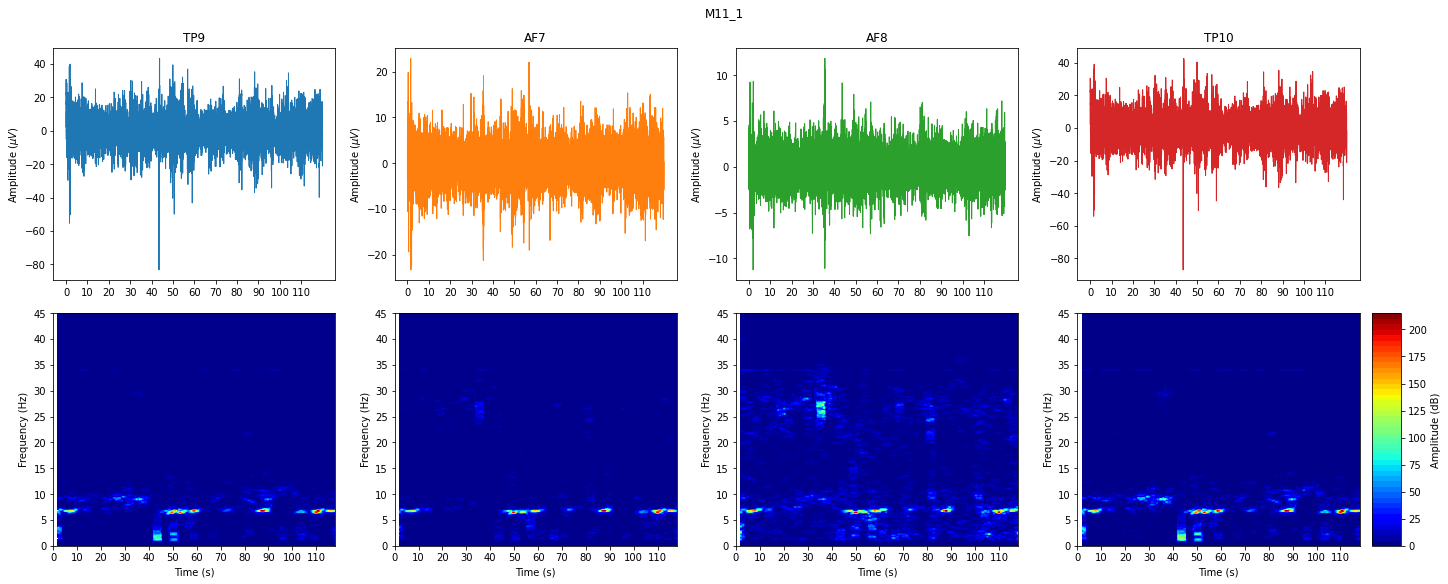

In [9]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M11_1,time_s,**args)

M11_2

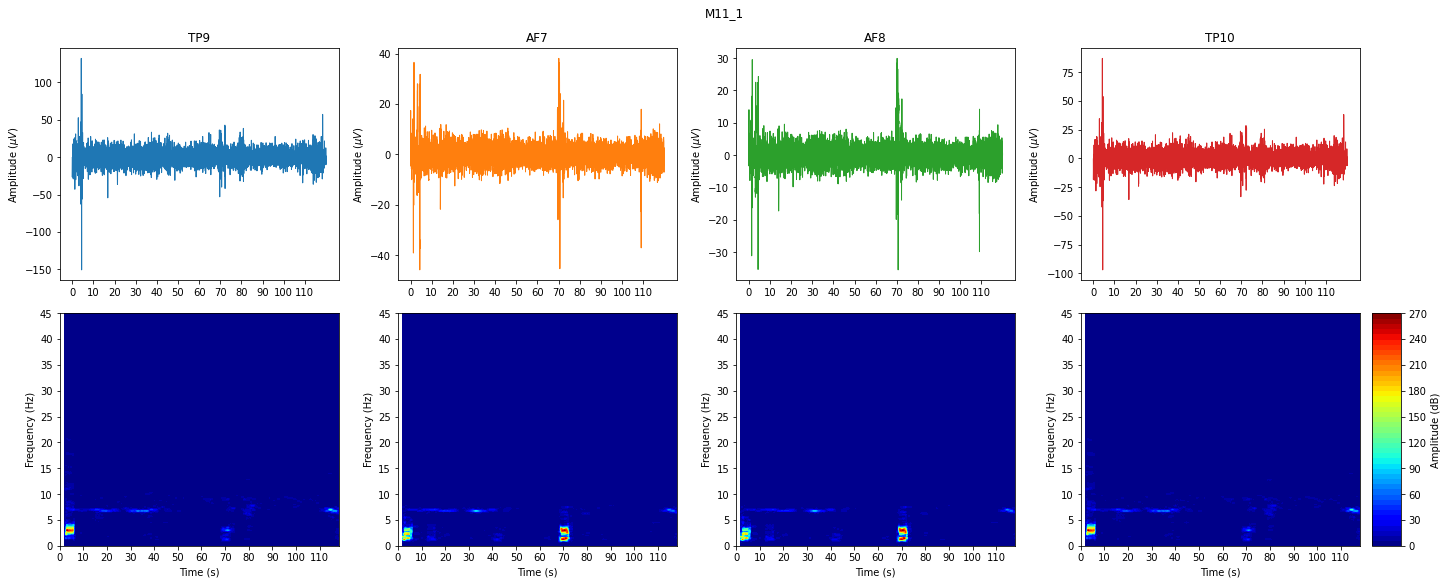

In [10]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M11_2,time_s,**args)

M11_3

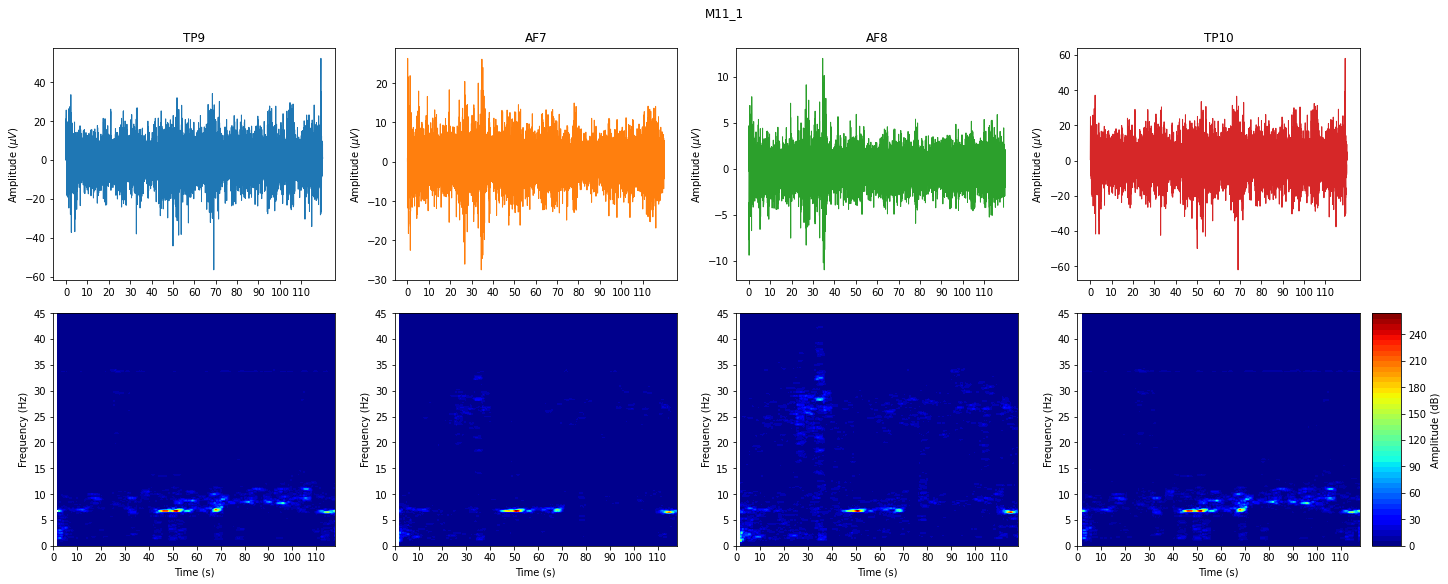

In [11]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M11_3,time_s,**args)

M11_4

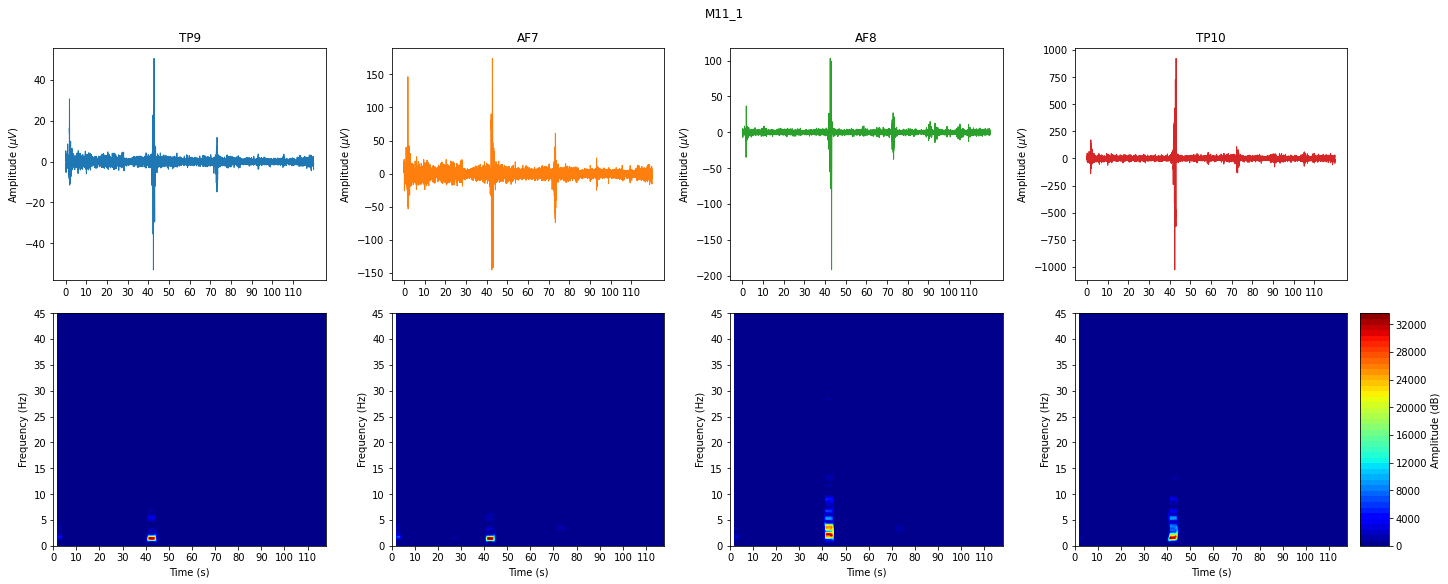

In [12]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M11_4,time_s,**args)

M11_5

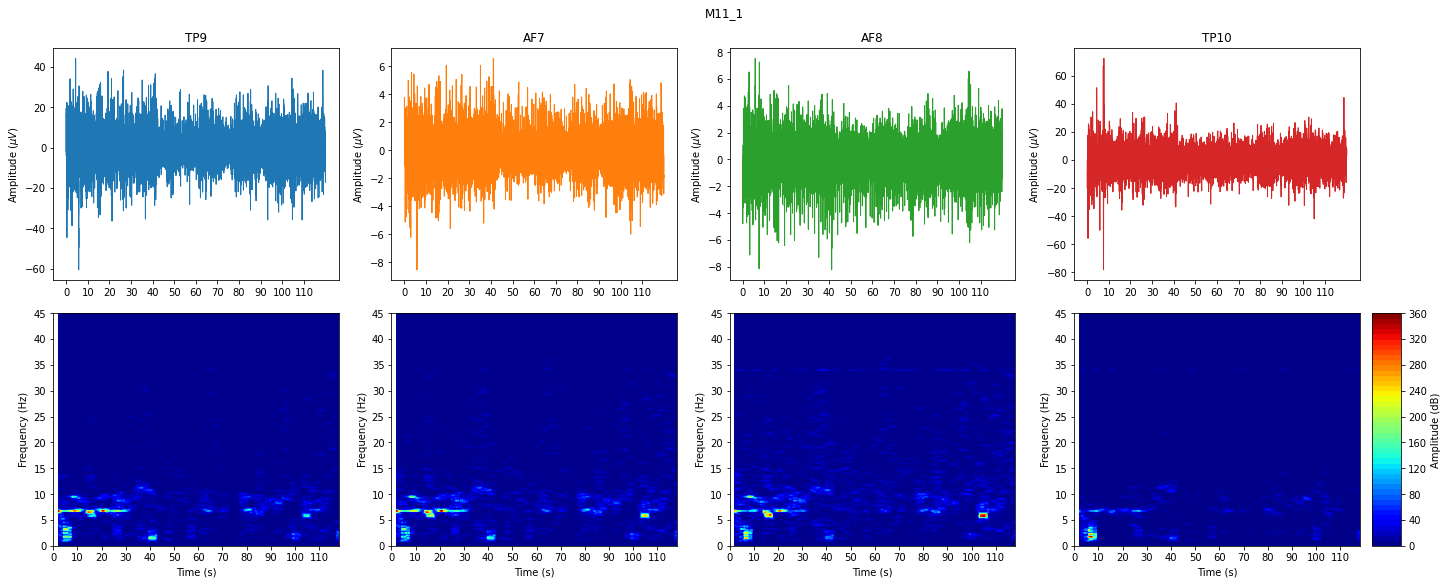

In [13]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M11_5,time_s,**args)

M11_AVERAGE

In [14]:
pk_M11 = np.stack((pk_M11_1,pk_M11_2,pk_M11_3,pk_M11_4,pk_M11_5),axis=0)
pk_M11_Avg = np.mean(pk_M11,axis=0)
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11 Average','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(pk_M11_Avg,time_s,**args)

NameError: name 'pk_M11_1' is not defined

M21_1

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M21_1,time_s,**args)

In [ ]:
ica_M21_1 = multipleFilesICA(band_M21,cfg.fs)[0]
wins = slidingWindow(ica_M21_1,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 20,1,1,15

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M21_1 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M21_1,time_s,**args)

M21_2

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M21_2,time_s,**args)

In [ ]:
ica_M21_2 = multipleFilesICA(band_M21,cfg.fs)[1]
wins = slidingWindow(ica_M21_2,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 50,6,6,6

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M21_2 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M21_2,time_s,**args)

M21_3

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M21_3,time_s,**args)

In [ ]:
ica_M21_3 = multipleFilesICA(band_M21,cfg.fs)[2]
wins = slidingWindow(ica_M21_3,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 5,5,5,5

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M21_3 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M21_3,time_s,**args)

M21_4

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M21_4,time_s,**args)

In [ ]:
ica_M21_4 = multipleFilesICA(band_M21,cfg.fs)[3]
wins = slidingWindow(ica_M21_4,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 10,3,10,3

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M21_4 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M21_4,time_s,**args)

M21_5

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M21_5,time_s,**args)

In [ ]:
ica_M21_5 = multipleFilesICA(band_M21,cfg.fs)[4]
wins = slidingWindow(ica_M21_5,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 10,3,10,10

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M21_5 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M21_5,time_s,**args)

M21_AVERAGE

In [ ]:
pk_M21 = np.stack((pk_M21_1,pk_M21_2,pk_M21_3,pk_M21_4,pk_M21_5),axis=0)
pk_M21_Avg = np.mean(pk_M21,axis=0)
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11 Average','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(pk_M21_Avg,time_s,**args)

M12_1

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M12_1,time_s,**args)

In [ ]:
ica_M12_1 = multipleFilesICA(band_M12,cfg.fs)[0]
wins = slidingWindow(ica_M12_1,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 15,3,16,15

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M12_1 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M12_1,time_s,**args)

M12_2

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M12_2,time_s,**args)

In [ ]:
ica_M12_2 = multipleFilesICA(band_M12,cfg.fs)[1]
wins = slidingWindow(ica_M12_2,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 13,8,8,15

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M12_2 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M12_2,time_s,**args)

M12_3

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M12_3,time_s,**args)

In [ ]:
ica_M12_3 = multipleFilesICA(band_M12,cfg.fs)[2]
wins = slidingWindow(ica_M12_3,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 15,9,15,12

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M12_3 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M12_3,time_s,**args)

M12_4

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M12_4,time_s,**args)

In [ ]:
ica_M12_4 = multipleFilesICA(band_M12,cfg.fs)[3]
wins = slidingWindow(ica_M12_4,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 12,12,25,16

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M12_4 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M12_4,time_s,**args)

M12_5

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M12_5,time_s,**args)

In [ ]:
ica_M12_5 = multipleFilesICA(band_M12,cfg.fs)[4]
wins = slidingWindow(ica_M12_5,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 10,3,15,10

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M12_5 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M12_5,time_s,**args)

M12_AVERAGE

In [ ]:
pk_M12 = np.stack((pk_M12_1,pk_M12_2,pk_M12_3,pk_M12_4,pk_M12_5),axis=0)
pk_M12_Avg = np.mean(pk_M12,axis=0)
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11 Average','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(pk_M12_Avg,time_s,**args)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(time_s,pk_M12_Avg[:,1])
Pxx, freqs, bins, im = ax2.specgram(pk_M12_Avg[:,1], NFFT=1024, Fs=cfg.fs, noverlap=1024/2)
ax2.set_ylim(0, 45)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
plt.show()

M22_1

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M22_1,time_s,**args)

In [ ]:
ica_M22_1 = multipleFilesICA(band_M22,cfg.fs)[0]
wins = slidingWindow(ica_M22_1,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 24,10,10,5

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M22_1 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M22_1,time_s,**args)

M22_2

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M22_2,time_s,**args)

In [ ]:
ica_M22_2 = multipleFilesICA(band_M22,cfg.fs)[1]
wins = slidingWindow(ica_M22_2,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 100,100,22,100

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M22_2 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M22_2,time_s,**args)

#pk_M22_2 = ica_M22_2

M22_3

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M22_3,time_s,**args)

In [ ]:
ica_M22_3 = multipleFilesICA(band_M22,cfg.fs)[2]
wins = slidingWindow(ica_M22_3,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 17,12,7,15

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M22_3 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M22_3,time_s,**args)

M22_4

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M22_4,time_s,**args)
pk_M22_4 = ica_M22_4

M22_5

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_M22_5,time_s,**args)

In [ ]:
ica_M22_5 = multipleFilesICA(band_M22,cfg.fs)[4]
wins = slidingWindow(ica_M22_5,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 45,4,45,15

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_M22_5 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_M22_5,time_s,**args)

M22_AVERAGE

In [ ]:
pk_M22 = np.stack((pk_M22_1,pk_M22_2,pk_M22_3,pk_M22_4,pk_M22_5),axis=0)
pk_M22_Avg = np.mean(pk_M22,axis=0)
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11 Average','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(pk_M22_Avg,time_s,**args)

C11_1

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21 Average','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_C11_1,time_s,**args)

In [ ]:
ica_C11_1 = multipleFilesICA(band_C11,cfg.fs)[0]
wins = slidingWindow(ica_C11_1,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 18,18,0.5,16

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_C11_1 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_C11_1,time_s,**args)

C11_2

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21 Average','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_C11_2,time_s,**args)

In [ ]:
ica_C11_2 = multipleFilesICA(band_C11,cfg.fs)[1]
wins = slidingWindow(ica_C11_2,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 20,16,16,14

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_C11_2 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_C11_2,time_s,**args)

C11_3

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21 Average','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_C11_3,time_s,**args)

C11_4

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21 Average','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_C11_4,time_s,**args)

In [ ]:
ica_C11_4 = multipleFilesICA(band_C11,cfg.fs)[3]
wins = slidingWindow(ica_C11_4,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 35,6,32,32

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_C11_4 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_C11_4,time_s,**args)

C11_5

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21 Average','tickRange':[0,120],'timeFrequencyDomainPlots':True}
plots(ica_C11_5,time_s,**args)

In [ ]:
ica_C11_5 = multipleFilesICA(band_C11,cfg.fs)[4]
wins = slidingWindow(ica_C11_5,time_s,0.125,0.125)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

thd_TP9,thd_AF7,thd_AF8,thd_TP10 = 18,18,16,16

wins_TP9 = manArtfRemoval(wins_TP9,thd_TP9)
wins_TP9 = wins_TP9.reshape(-1,1)
wins_AF7 =  manArtfRemoval(wins_AF7,thd_AF7)
wins_AF7 = wins_AF7.reshape(-1,1)
wins_AF8 = manArtfRemoval(wins_AF8,thd_AF8)
wins_AF8 = wins_AF8.reshape(-1,1)
wins_TP10 = manArtfRemoval(wins_TP10,thd_TP10)
wins_TP10 = wins_TP10.reshape(-1,1)

args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','tickRange':[0,120],'timeFrequencyDomainPlots':True}
pk_C11_5 = np.hstack((wins_TP9,wins_AF7,wins_AF8,wins_TP10))
plots(pk_C11_5,time_s,**args)

In [ ]:
# compute power spectrum of each window per channel
delta_low,delta_high = cfg.brainwaves['delta'][0],cfg.brainwaves['delta'][1]
theta_low,theta_high = cfg.brainwaves['theta'][0],cfg.brainwaves['theta'][1]
alpha_low,alpha_high = cfg.brainwaves['alpha'][0],cfg.brainwaves['alpha'][1]
beta_low,beta_high = cfg.brainwaves['beta'][0],cfg.brainwaves['beta'][1]
gamma_low,gamma_high = cfg.brainwaves['gamma'][0],cfg.brainwaves['gamma'][1]

#  Music Therapy Group: Delta Band
delta_M11 = multipleAvgBandPower(pk_M11,cfg.fs,delta_low,delta_high)
delta_M21 = multipleAvgBandPower(pk_M21,cfg.fs,delta_low,delta_high)
theta_M11 = multipleAvgBandPower(pk_M11,cfg.fs,theta_low,theta_high)
theta_M21 = multipleAvgBandPower(pk_M21,cfg.fs,theta_low,theta_high)
alpha_M11 = multipleAvgBandPower(pk_M11,cfg.fs,alpha_low,alpha_high)
alpha_M21 = multipleAvgBandPower(pk_M21,cfg.fs,alpha_low,alpha_high)
beta_M11 = multipleAvgBandPower(pk_M11,cfg.fs,beta_low,beta_high)
beta_M21 = multipleAvgBandPower(pk_M21,cfg.fs,beta_low,beta_high)
gamma_M11 = multipleAvgBandPower(pk_M11,cfg.fs,gamma_low,gamma_high)
gamma_M21 = multipleAvgBandPower(pk_M21,cfg.fs,gamma_low,gamma_high)